## Analyzing Retail Store Sales - Exploratory Data Analysis with SQL

### Introduction
In this notebook, we will use Structured Query Languaage (SQL) to explore the retail dataset from a global superstore between 2015 to 2019. SQL was chosen for this analysis because of its ability to easily access and manipulate databases.

This type of analysis is useful for stakeholders to determine what products are likely to increase sales, the products to focus on, and how best to attract their customers. This would help them understand their target market in order to increase revenue.

### Data Source
For privacy purposes, the name of the retail store is not disclosed, however, the dataset was obtained from Kaggle and can be accessed from https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting. The data is easy to understand, and minimal data preparation was needed for this analysis. 

### Questions
We hope to answer the following questions at the end of this analysis:

 1. What are the top selling products for this store?
 2. Which regions are contibuting greatly to the company's revenue?
 3. What is the preferred mode of shipping?

### Importing Dependencies
The important libraries will be imported from the following commands. The SQLAlchemy library will also be used to faciliate the communication between Python and the database where the dataset is stored.

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql
!pip install seaborn
import seaborn as sns

  Using cached ibm_db-3.1.0-cp38-cp38-macosx_10_15_x86_64.whl
  Using cached ibm_db_sa-0.3.3-py3-none-any.whl
  Using cached SQLAlchemy-1.4.44-cp38-cp38-macosx_10_15_x86_64.whl (1.6 MB)
  Using cached greenlet-2.0.1-cp38-cp38-macosx_10_15_x86_64.whl (203 kB)
  Attempting uninstall: ibm_db
    Found existing installation: ibm-db 3.1.0
    Uninstalling ibm-db-3.1.0:
      Successfully uninstalled ibm-db-3.1.0
  Attempting uninstall: greenlet
    Found existing installation: greenlet 2.0.1
    Uninstalling greenlet-2.0.1:
      Successfully uninstalled greenlet-2.0.1
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.24
    Uninstalling SQLAlchemy-1.3.24:
      Successfully uninstalled SQLAlchemy-1.3.24
  Attempting uninstall: ibm_db_sa
    Found existing installation: ibm-db-sa 0.3.3
    Uninstalling ibm-db-sa-0.3.3:
      Successfully uninstalled ibm-db-sa-0.3.3
Found existing installation: SQLAlchemy 1.4.44
Uninstalling SQLAlchemy-1.4.44:
  Successfully 

In [3]:
%load_ext sql

###
### Connecting to the Database
The dataset was stored in a DB Browser for SQLite on my desktop as "SalesData.db". We would need to connect to this database in order to load the dataset for the analysis

In [4]:
%sql sqlite:////Users/kwaghngu/Desktop/SalesData.db

###
### Data Cleaning and Pre-processing
After connecting to the database, the dataset is imported to a pandas dataframe with the read_csv function. The head function will be used to load the first 5 rows of the dataset. In the same way, the tail function can be used to see the last 5 rows of the dataset

In [5]:
df = pd.read_csv('SalesTable.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


###
### Checking for missing values
The 'null' function is used to check for any missing values that may exist in the dataset. I found that the 'Postal Code' column was missing 11 values. Instead of dropping these values, I decided to identify the city with the missing values in order to replace them

In [95]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


From extracting the dataframe with the missing values, we can see that Burlington is missing 11 Postal Codes. Using the 'fillna' function, the 'NaN' values will be replaced with correct postal code, 5402

In [96]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [97]:
df['Postal Code'] = df['Postal Code'].fillna(5402) #5402 is the postal code for Burlington

The various columns in the dataframe can be printed out to check that the replacement was done correctly. 

In [98]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


No more missing values in the dataset. We can now query the data.

###
### Exploratory Data Analysis
In addition to the main questions we would like to answer in this analysis, we would also use SQL to query the dataset and answer other questions to gain insights

**1. Total number of entries in the dataset**

In [6]:
%%sql select count(*) as 
Number_of_Entries from SalesTable

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


Number_of_Entries
9800


###
**2. Total Revenue generated between 2015 to 2019**

In [100]:
%%sql select SUM(ROUND(Sales)) 
as Total_Sales from SalesTable 

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


Total_Sales
2261687.0


###
**3. How much does each product category contribute to the Revenue?**

In [101]:
%%sql select Category, Sum(ROUND(Sales)) 
as Total_Sales  from SalesTable 
group by Category
order by sum(Sales)

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


Category,Total_Sales
Office Supplies,705502.0
Furniture,728664.0
Technology,827521.0


###
**4. Which 10 cities contribute the most to the revenue?**

In [102]:
%%sql select City, Sum(ROUND(Sales)) as Total_Sales 
from SalesTable 
group by City
order by sum(Sales) desc
limit 10

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


City,Total_Sales
New York City,252493.0
Los Angeles,173427.0
Seattle,116117.0
San Francisco,109062.0
Philadelphia,108850.0
Houston,63955.0
Chicago,47821.0
San Diego,47521.0
Jacksonville,44712.0
Detroit,42453.0


###
**5. Which customer generated the most sales between 2015 to 2019?**

In [8]:
%%sql select CustomerName, 
MAX(ROUND(Sales)) 
as Maximum_Sales from SalesTable

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


CustomerName,Maximum_Sales
Sean Miller,22638.0


###
**6. Which 10 Products contribute the most to the Revenue?**

In [9]:
%%sql select ProductName, Sum(ROUND(Sales)) 
as Total_Sales  from SalesTable 
group by ProductName
order by sum(Sales) desc
limit 10

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


ProductName,Total_Sales
Canon imageCLASS 2200 Advanced Copier,61600.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27454.0
Cisco TelePresence System EX90 Videoconferencing Unit,22638.0
HON 5400 Series Task Chairs for Big and Tall,21870.0
GBC DocuBind TL300 Electric Binding System,19824.0
GBC Ibimaster 500 Manual ProClick Binding System,19026.0
Hewlett Packard LaserJet 3310 Copier,18840.0
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18375.0
GBC DocuBind P400 Electric Binding System,17965.0
High Speed Automatic Electric Letter Opener,17031.0


###
**7. Top 10 customers that contributed to the Revenue**

In [10]:
%%sql select CustomerName, Sum(ROUND(Sales)) as Total_Sales
from SalesTable 
group by CustomerName
order by sum(Sales) desc
limit 10

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


CustomerName,Total_Sales
Sean Miller,25042.0
Tamara Chand,19050.0
Raymond Buch,15117.0
Tom Ashbrook,14596.0
Adrian Barton,14476.0
Ken Lonsdale,14175.0
Sanjit Chand,14145.0
Hunter Lopez,12875.0
Sanjit Engle,12209.0
Christopher Conant,12128.0


###
**8. Revenue from a particular customer: Lynn Smith**

In [11]:
%%sql select CustomerName, SUM(ROUND(Sales)) as Sales
from SalesTable 
where CustomerName like '%Lynn Smith%'

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


CustomerName,Sales
Lynn Smith,1007.0


###
**9. Total Sales for Los Angeles**

In [107]:
%%sql select City, Sum(ROUND(Sales)) as Total_Sales from SalesTable 
where City like '%Los Angeles%'
group by City
order by sum(Sales)

 * sqlite:////Users/kwaghngu/Desktop/SalesData.db
Done.


City,Total_Sales
Los Angeles,173427.0


###
### Data Visualization
**1. Bar plot of Top 20 customers with the highest total purchase between 2015 to 2019**

In [12]:
Top20_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)
Top20_customers = Top20_customers[["Sales"]].round(2) # Round Sales values to 2 decimal places
Top20_customers.reset_index(inplace=True) #reset the index to add the customer name into dataframe 

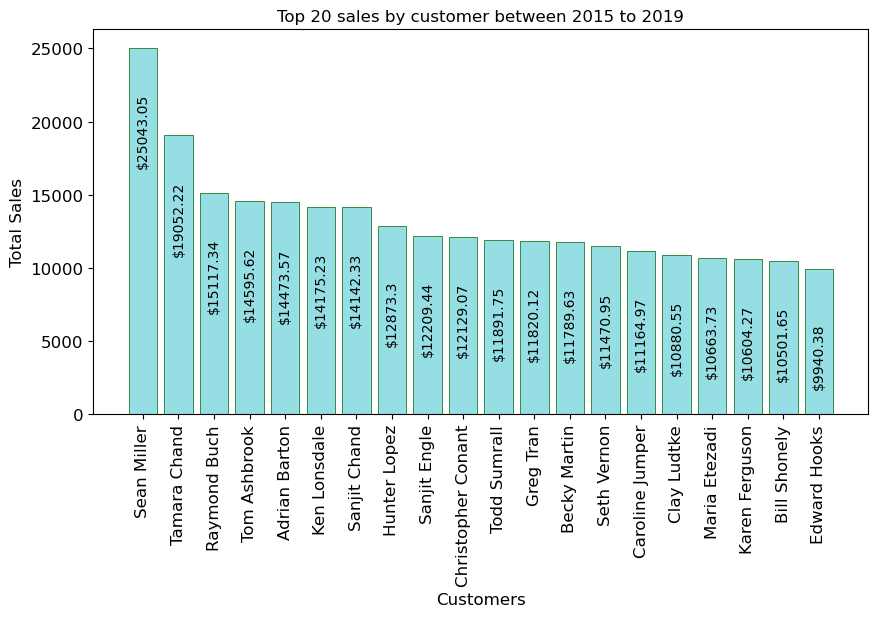

In [13]:
plt.figure(figsize = (10,5)) # width and height of figure in inches
plt.title("Top 20 sales by customer between 2015 to 2019", fontsize=12) 
plt.bar(Top20_customers["Customer Name"], Top20_customers["Sales"],color= '#95DEE3',edgecolor='darkgreen', linewidth = 0.5)
plt.xlabel("Customers",fontsize=12) # x axis shows the customers 
plt.ylabel("Total Sales",fontsize=12) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,value in Top20_customers["Sales"].items(): #To show the values in the figure
    plt.text(k,value-8000,'$'+ str(value), fontsize=10,rotation=90,color='k', horizontalalignment='center')

###
**2. Bar plot of the Top 20 Cities with the highest sales generation**

In [14]:
Top20_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the sales by states
Top20_cities = Top20_cities[["Sales"]].round(2) # Round off the Sales Value to 2 decimal places
Top20_cities.reset_index(inplace=True) # Reset the index to add 'cities' into the dataframe

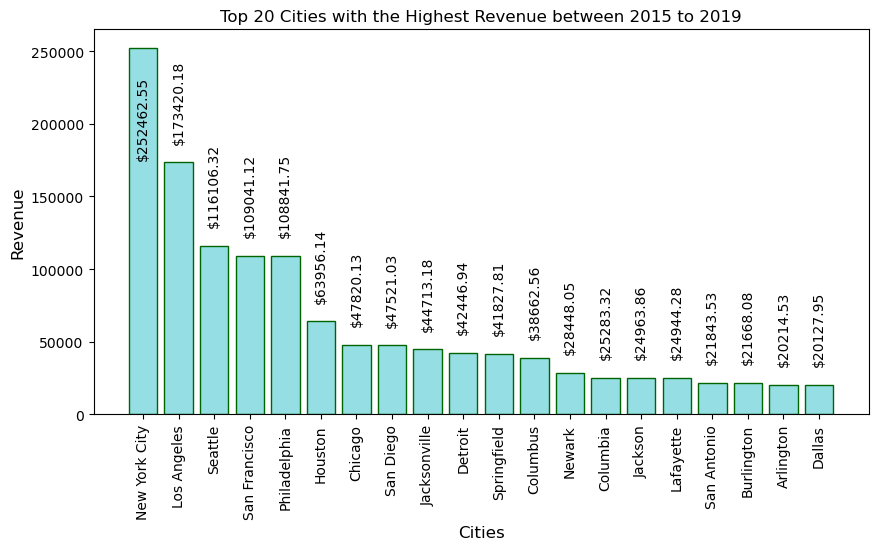

In [15]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Top 20 Cities with the Highest Revenue between 2015 to 2019", fontsize=12)
plt.bar(Top20_cities["City"], Top20_cities["Sales"],color= '#95DEE3',edgecolor='darkgreen', linewidth = 1)
plt.xlabel("Cities",fontsize=12)  # x axis shows the States
plt.ylabel("Revenue",fontsize=12)  # y axis shows the Revenue
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
for k,value in Top20_cities["Sales"].items(): #To show the values in the figure
    if value>250000:
        plt.text(k,value-75000,'$'+ str(value), fontsize=10,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,value+15000,'$'+ str(value), fontsize=10,rotation=90,color='k', horizontalalignment='center');

###
**3. Pie Chart of Product Categories**

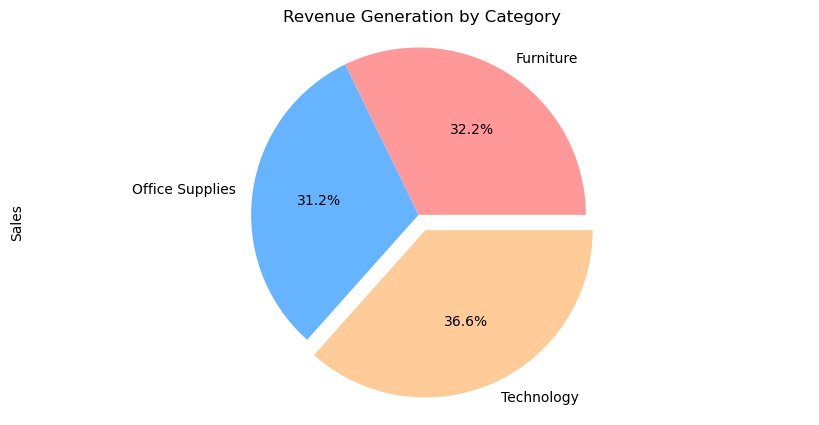

In [16]:
df_Category = df.groupby('Category', axis = 0).sum()
colors = ['#ff9999','#66b3ff','#ffcc99',]
explode = (0,0,0.1) #Explode function to isolate one section of the pie chart
df_Category['Sales'].plot(kind = 'pie', figsize=(10,5), shadow=False, colors=colors, explode=explode, autopct='%1.1f%%') 
plt.title('Revenue Generation by Category')
plt.axis('equal')
plt.show()

More Technology purchased over Office Supplies and Furniture.

###
**4. Bar chat of Revenue generated by Region**

In [17]:
Regions = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region by sales
Regions = Regions[["Sales"]].astype(int) # To cast sales column as integer
Regions.reset_index(inplace=True) #Reset index to add the Region column into the data frame

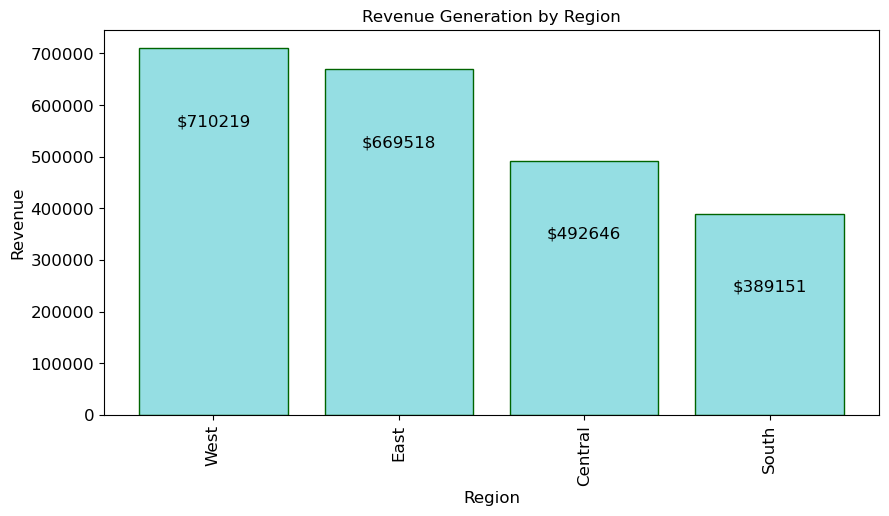

In [18]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Revenue Generation by Region", fontsize=12)
plt.bar(Regions["Region"], Regions["Sales"],color= '#95DEE3',edgecolor='darkgreen', linewidth = 1)
plt.xlabel("Region",fontsize=12) 
plt.ylabel("Revenue",fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Regions["Sales"].items(): #To show the exact revenue generated on the figure
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

###
**5. Bar chart of the Top 10 Selling Products** 

In [19]:
Top10_products=df.groupby(['Product Name']).sum().sort_values('Sales',ascending=False).head(10)
Top10_products=Top10_products[['Sales']].round(2) #To round to 2 decimal places
Top10_products.reset_index(inplace=True)#To put sales back in the column
Top10_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


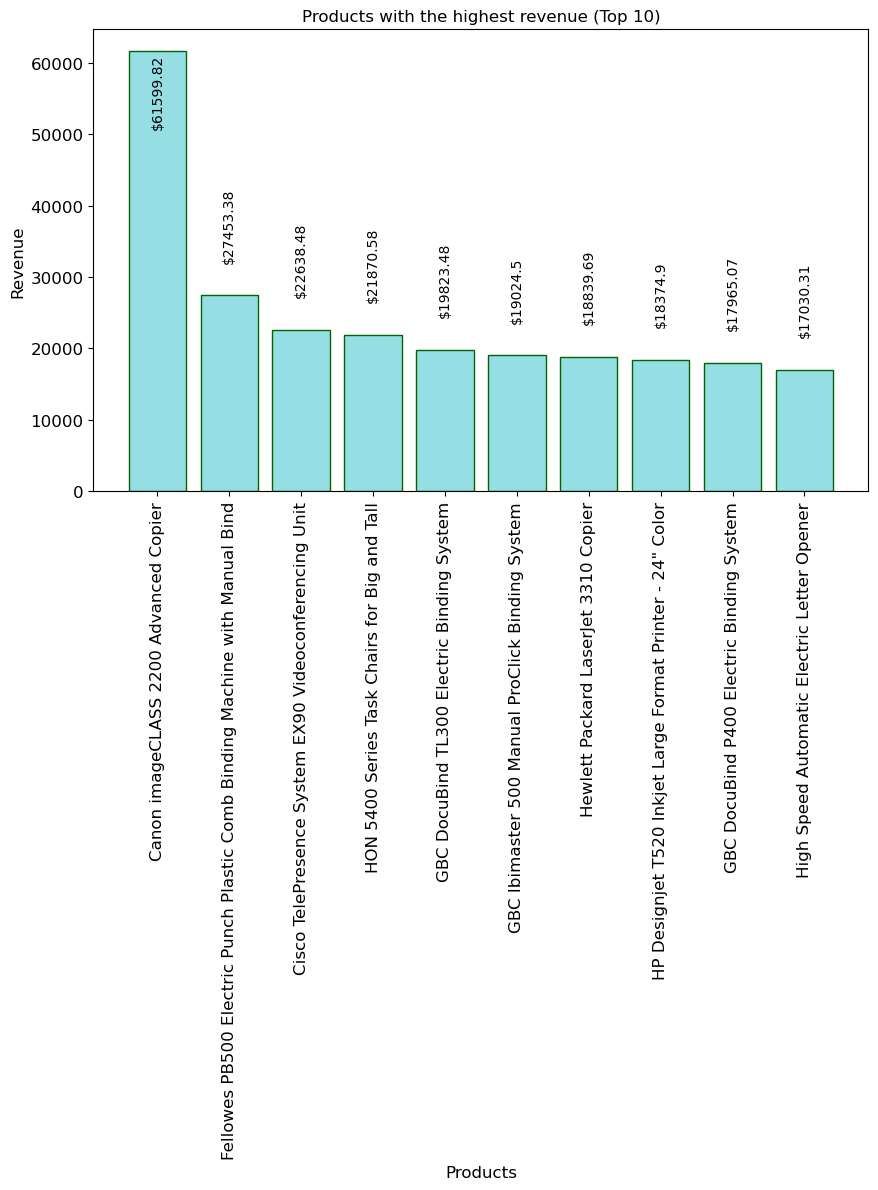

In [20]:
plt.figure(figsize=(10,6))
plt.bar(Top10_products['Product Name'],Top10_products['Sales'],color='#95DEE3',edgecolor='darkgreen')
plt.xticks(rotation='vertical')
plt.title('Products with the highest revenue (Top 10)',fontsize=12)
plt.xlabel('Products',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,value in Top10_products["Sales"].items(): #To show the values in the figure
    if value>60000:
        plt.text(k,value-10500,'$'+ str(value), fontsize=10,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,value+5000,'$'+ str(value), fontsize=10,rotation=90,color='k', horizontalalignment='center');

###
**6. Bar plot of Sales Ship Category**

In [21]:
shipmode_sales = pd.DataFrame(df.groupby(df['Ship Mode']).sum()['Sales'].reset_index())
shipmode_sales = shipmode_sales.nlargest(4,'Sales')
shipmode_sales.head()

,Ship Mode,Sales
3,Standard Class,1.340831e+06
2,Second Class,4.499142e+05
0,First Class,3.455723e+05
1,Same Day,1.252190e+05


<AxesSubplot: title={'center': 'Sales by Ship mode'}, xlabel='Ship Mode', ylabel='Sales'>

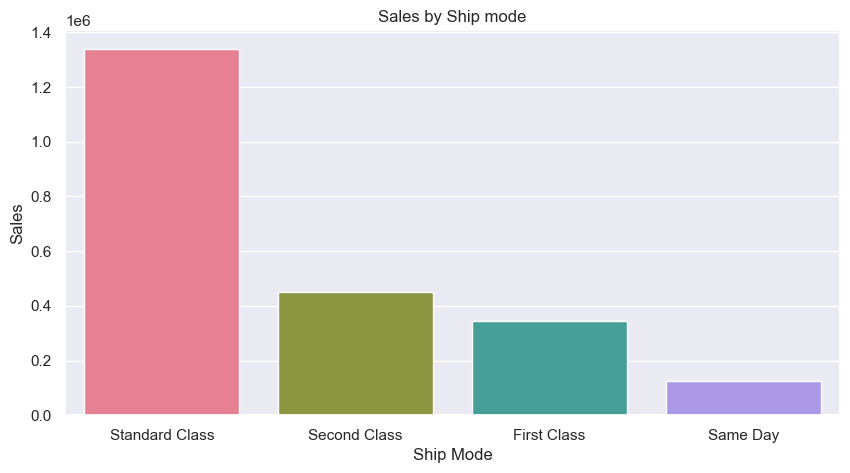

In [22]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5));
plt.title('Sales by Ship mode')
sns.set_style('darkgrid')
sns.barplot(data=shipmode_sales, x ='Ship Mode',y='Sales', palette='husl')

###
### Insights
- Total Revenue generated by the company between 2015 to 2019 is $2,261,687. 

- The Canon ImageCLASS 2200 Advanced Copier generated the highest revenue with a total value of approximately $61,600.

- The West Region contributed the most to the revenue of the company with a total values of $710,219. 

- Technology is the most purchased product category contributing to 36.6% of the total revenue

- The majority of the customers prefer the Standard class ship mode. The results show that very few customers are interested in getting same day shipping. 

### Conclusion
With the increasing popularity of remote jobs and the ever-evolving need for modern day technologies, it is expected that technological purchases will highly exceed that of office supplies in the near future. The company can work towards generating more revenue from the lowest selling products by incorporating cross-selling and upselling strategies. One example would be to recommend such products as add-ons for in-store and online purchases. 